# Image Classification with Convolutional Neural Networks

## Introduction

## Exploring the CIFAR-10 Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets

# Load the CIFAR-10 dataset included in keras
cifar10_data = datasets.cifar10

# split the CIFAR-10 dataset into training and testing sets.
(training_examples, training_labels), (test_examples, test_labels) = cifar10_data.load_data()

# Verify dimensions of the training and testing sets.
print(training_examples.shape)
print(test_examples.shape)

2022-04-18 17:21:13.882505: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-18 17:21:13.882531: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [2]:
# view a single example in the dataset
print(training_examples[7])

# view the corresponding label
print(training_labels[7])

[[[ 28  35  39]
  [ 30  34  44]
  [ 33  44  47]
  ...
  [ 43  56  45]
  [ 52  64  53]
  [ 46  58  47]]

 [[ 27  30  38]
  [ 27  28  41]
  [ 21  31  39]
  ...
  [112 136  97]
  [117 140 101]
  [115 138 100]]

 [[ 34  36  42]
  [ 33  33  43]
  [ 24  30  40]
  ...
  [175 208 143]
  [177 209 144]
  [176 208 143]]

 ...

 [[142 176 118]
  [142 176 118]
  [150 184 127]
  ...
  [134 175 119]
  [128 168 112]
  [134 175 119]]

 [[140 176 124]
  [145 180 129]
  [150 186 134]
  ...
  [131 170 119]
  [130 170 119]
  [122 162 111]]

 [[134 171 123]
  [136 171 124]
  [136 171 124]
  ...
  [106 144 100]
  [104 142  99]
  [101 140  96]]]
[7]


In [3]:
# visualising a sample of the training dataset.
import numpy as np
import matplotlib.pyplot as plt

# create a mapping to the text label
label_set = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
unique_training_labels = np.unique(training_labels)

# print out the index - text name mapping
for i in range(len(unique_training_labels)):
    print(unique_training_labels[i], label_set[unique_training_labels[i]])

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


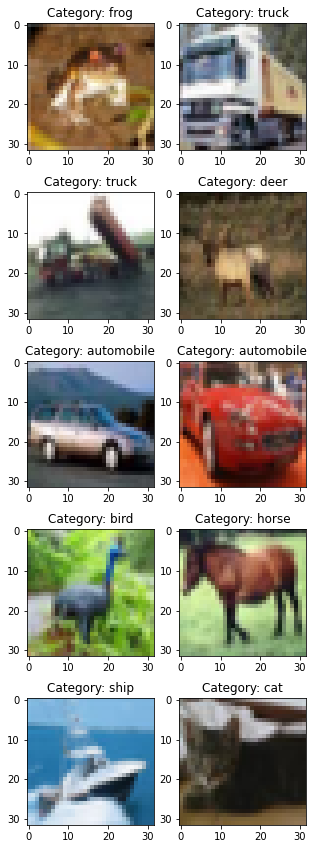

In [4]:
# create the canvas for our plots
plt.figure(figsize=(5,15))
num_classes = len(unique_training_labels)

# print out the first 10 training examples with their corresponding label.
for i in range(num_classes):
    plt.subplot(5, 2, i + 1)
    plt.title("Category: {}".format(label_set[training_labels[i][0]]))
    plt.imshow(training_examples[i])
plt.show()

## CNN Classifier Architecture and Configurations

### CNN Network Architecture

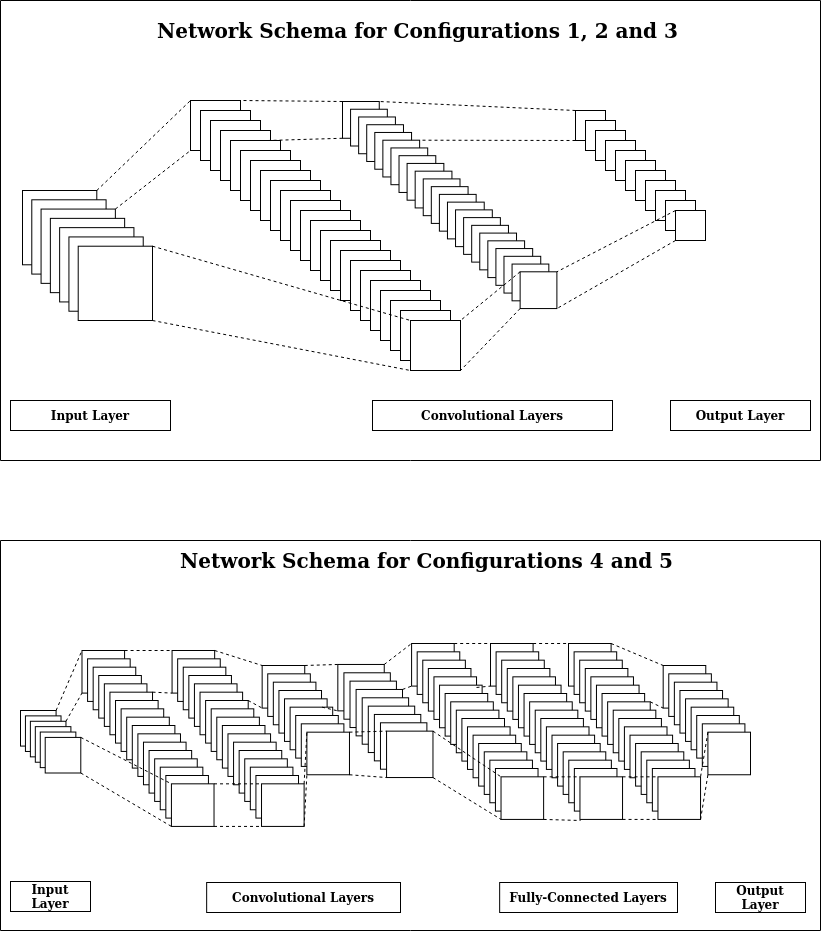

### Network Model: Configurations

**Network Structure**

|Layer  |Config. 1 | Config. 2 | Config. 3 | Config. 4 | Config. 5 | Config 6. |
|-------|:--------:|:---------:|:---------:|:---------:|:---------:|:---------:|
|CL     | 2        | 2         | 2         | 4         | 4         | 4         |
|FCL    | 1        | 1         | 1         | 3         | 4         | 3         |
|Dropout| -        | -         | 2         | 6         | 6         | 6         |
|Pooling| -        | -         | -         | Max       | Max       | Max       |
|Padding| same     | same      | same      | same      | same      | same      |

**Hyperparameters Selection: configurations 1,2 and 3**

|Hyperparameter     |Config. 1                   | Config. 2                  | Config. 3                  |
|:------------------|:---------------------------|:---------------------------|:---------------------------|
|Activation Function|ReLU and SoftMax            |ReLU and SoftMax            |ReLU and SoftMax            |
|Optimizer          |Stochastic Gradient Descent |Adam                        |Adam                        |
|Loss Function      |Categorical Cross Entropy   |Categorical Cross Entropy   |Categorical Cross Entropy   |
|Number of Batches  |32                          |32                          |32                          |
|Number of Epochs   |30                          |30                          |30                          |
|Dropout Rate       |20%                         |20%                         |20%                         |
|Kernel Initializer |He Normalisation            |He Normalisation            |He Normalisation            |
|Bias Initializer   |Zeros                       |Zeros                       |Zeros                       |

**Hyperparameter Selections: configurations 4, 5 and 6**

|Hyperparameter     | Config. 4                  | Config. 5                  | Config. 6                  |
|:------------------|:---------------------------|:---------------------------|:---------------------------|
|Activation Function|ReLU and SoftMax            |ReLU and Sigmoid            |ReLU and tanh            |
|Optimizer          |Adam                        |Adam                        |Adam                        |
|Loss Function      |Categorical Cross Entropy   |Categorical Cross Entropy   |Categorical Cross Entropy   |
|Number of Batches  |32                          |32                          |32                          |
|Number of Epochs   |30                          |30                          |30                          |
|Dropout Rate       |20%                         |20%                         |20%                         |
|Kernel Initializer |He Normalisation            |He Normalisation            |He Normalisation            |
|Bias Initializer   |Zeros                       |Zeros                       |Zeros                       |

## Data Preprocessing

In [5]:
mean = np.mean(training_examples)
stddev = np.std(training_examples)
training_examples = (training_examples - mean) / stddev
test_examples = (test_examples - mean) / stddev

# encode labels to one-hot format
from tensorflow.keras.utils import to_categorical
training_labels = to_categorical(training_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# viewing the standardised data
training_examples[0]

array([[[-0.96192505, -0.91515971, -0.89957127],
        [-1.21134019, -1.16457485, -1.1801633 ],
        [-1.10222107, -1.13339796, -1.21134019],
        ...,
        [ 0.58133111,  0.17603151, -0.19809119],
        [ 0.48780043,  0.06691239, -0.29162187],
        [ 0.42544665,  0.05132394, -0.27603342]],

       [[-1.63222823, -1.56987445, -1.56987445],
        [-1.88164337, -1.88164337, -1.88164337],
        [-1.60105134, -1.7569358 , -1.88164337],
        ...,
        [ 0.0357355 , -0.50986012, -1.02427884],
        [-0.02661829, -0.58780235, -1.10222107],
        [ 0.02014705, -0.52544856, -0.99310194]],

       [[-1.49193222, -1.50752067, -1.554286  ],
        [-1.63222823, -1.77252425, -1.88164337],
        [-1.11780951, -1.46075533, -1.7569358 ],
        ...,
        [-0.04220673, -0.5722139 , -1.10222107],
        [-0.01102984, -0.5722139 , -1.10222107],
        [-0.18250275, -0.74368681, -1.22692864]],

       ...,

       [[ 1.36075342,  0.76839246, -0.38515255],
        [ 1

## CNN Implementation: Configuration 1

### Auxiliary Function for Printing Graphs of Model Accurracies and Losses

In [6]:
# FUNCTION OF ACCURACIES AND LOSSES PLOTS

def model_analysis_plot (model_history):
    import matplotlib.pyplot as plt
    import numpy as np
    fig, axes = plt.subplots(2, 1, figsize=(5, 15))
    # analysis of accuracies
    axes[0].plot(range(1, len(model_history['accuracy']) + 1), model_history['accuracy'])
    axes[0].plot(range(1, len(model_history['val_accuracy']) + 1), model_history['val_accuracy'])
    axes[0].set_title('Model Accuracies')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xticks(np.arange(1, len(model_history['accuracy']) + 1, len(model_history['accuracy']) / 10))
    axes[0].legend(['training', 'validation'], loc='best')
    # analysis of losses
    axes[1].plot(range(1, len(model_history['loss']) + 1), model_history['loss'])
    axes[1].plot(range(1, len(model_history['val_loss']) + 1), model_history['val_loss'])
    axes[1].set_title('Model Losses')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].set_xticks(np.arange(1, len(model_history['loss']) + 1, len(model_history['loss']) / 10))
    axes[1].legend(['training', 'validation'], loc='best')
    plt.show()

### Building the Network with Configuration 1

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

model1 = Sequential()

# first convolution layer
model1.add(Conv2D(64, (5,5), strides=(2,2), padding="same", activation='relu', input_shape=(32,32, 3),
                  kernel_initializer='he_normal', bias_initializer="zeros"))

# second convolution layer
model1.add(Conv2D(64, (3,3), strides=(2,2), padding="same", activation='relu',
                  kernel_initializer='he_normal', bias_initializer="zeros"))

# flatten the output
model1.add(Flatten())

# add the fully connected layer
model1.add(Dense(10, activation="softmax", kernel_initializer='he_normal', bias_initializer="zeros"))

# compile the model
model1.compile(loss='categorical_crossentropy',
               optimizer='sgd',
               metrics=['accuracy', 'mse', 'mae'])

2022-04-18 17:21:17.995816: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-18 17:21:17.995853: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-18 17:21:17.995883: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (davianc-TP-E480): /proc/driver/nvidia/version does not exist
2022-04-18 17:21:17.996144: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Compiling and Summarising Model 1

In [8]:
model1.compile(loss='categorical_crossentropy',
               optimizer='sgd',
               metrics=['accuracy', 'mse', 'mae'])

# summarise the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 10)                40970     
                                                                 
Total params: 82,762
Trainable params: 82,762
Non-trainable params: 0
_________________________________________________________________


### Saving, Loading and Training Model 1

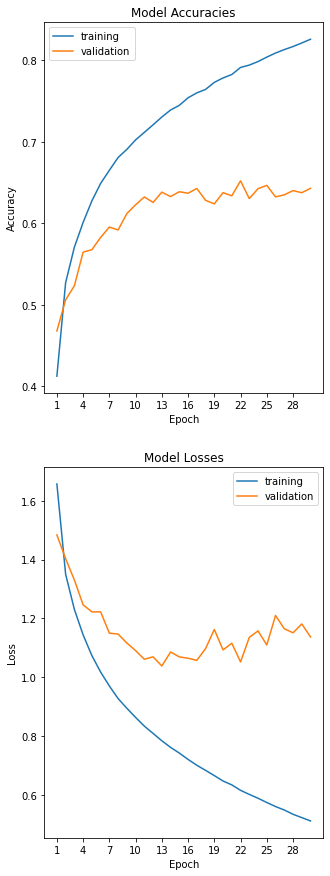

In [9]:
# saving and loading the model
import os
import pickle

# create the path for saving the model and its history
model1_path = "cifar10_model1.saved_model"
model1_history_path = "cifar10_model1.saved_model_history"

if os.path.exists(model1_path) and os.path.exists(model1_history_path):
    # Load trained model
    model1 = tf.keras.models.load_model(model1_path)
    history1 = pickle.load(open(model1_history_path, "rb"))
    model_analysis_plot(history1)
else:
    # Train new model
    tf.random.set_seed(12345)
    model1.fit(training_examples, training_labels,
               batch_size = 64,
               epochs = 30,
               verbose = 2,
               validation_data = (test_examples, test_labels))
    history1 = model1.history.history
    model1.save(model1_path)
    pickle.dump(history1, open(model1_history_path, "wb"))
    model_analysis_plot(history1)

### Summarising Model 1's Performance

In [10]:
print(f"Model 1 Training Accuracy: {history1['accuracy'][-1]:.4}")
print(f"Model 1 Validation Accuracy: {history1['val_accuracy'][-1]:.4}")
print(f"Model 1 Training Loss: {history1['loss'][-1]:.4}")
print(f"Model 1 Validation Loss: {history1['val_loss'][-1]:.4}")
print(f"Model 1 Training Mean Square Error: {history1['mse'][-1]:.4}")
print(f"Model 1 Validation Mean Square Error: {history1['val_mse'][-1]:.4}")
print(f"Model 1 Training Mean Absolute Error: {history1['mae'][-1]:.4}")
print(f"Model 1 Validation Mean Absolute Error: {history1['val_mae'][-1]:.4}")

Model 1 Training Accuracy: 0.826
Model 1 Validation Accuracy: 0.6431
Model 1 Training Loss: 0.5111
Model 1 Validation Loss: 1.137
Model 1 Training Mean Square Error: 0.02501
Model 1 Validation Mean Square Error: 0.04998
Model 1 Training Mean Absolute Error: 0.05497
Model 1 Validation Mean Absolute Error: 0.08187


## CCN Implementation: Configuration 2

### Building the Network with Configuration 2

In [11]:
model2 = Sequential()

# first convolution layer
model2.add(Conv2D(64, (5,5), strides=(2,2), padding="same", activation='relu', input_shape=(32,32, 3),
                  kernel_initializer='he_normal', bias_initializer="zeros"))

# second convolution layer
model2.add(Conv2D(64, (3,3), strides=(2,2), padding="same", activation='relu',
                  kernel_initializer='he_normal', bias_initializer="zeros"))

# flatten the output
model2.add(Flatten())

# add the fully connected layer
model2.add(Dense(10, activation="softmax", kernel_initializer='he_normal', bias_initializer="zeros"))

### Compiling and Summarising Model 2

In [12]:
# compile the model
model2.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy', 'mse', 'mae'])

# summarise the model
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        4864      
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                40970     
                                                                 
Total params: 82,762
Trainable params: 82,762
Non-trainable params: 0
_________________________________________________________________


### Saving, Loading and Training Model 2

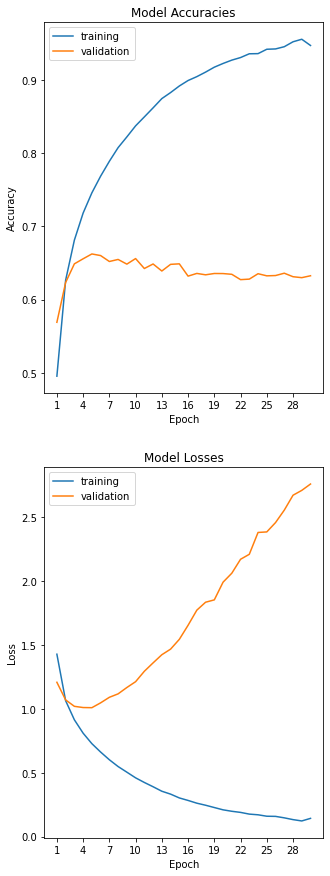

In [13]:
# create the path for saving the model and its history
model2_path = "cifar10_model2.saved_model"
model2_history_path = "cifar10_model2.saved_model_history"

if os.path.exists(model2_path) and os.path.exists(model2_history_path):
    # Load trained model
    model2 = tf.keras.models.load_model(model2_path)
    history2 = pickle.load(open(model2_history_path, "rb"))
    model_analysis_plot(history2)
else:
    # Train new model
    tf.random.set_seed(12345)
    model2.fit(training_examples, training_labels,
               batch_size = 64,
               epochs = 30,
               verbose = 2,
               validation_data = (test_examples, test_labels))
    history2 = model2.history.history
    model2.save(model2_path)
    pickle.dump(history2, open(model2_history_path, "wb"))
    model_analysis_plot(history2)

### Summarising Model 2's Performance

In [14]:
print(f"Model 2 Training Accuracy: {history2['accuracy'][-1]:.4}")
print(f"Model 2 Validation Accuracy: {history2['val_accuracy'][-1]:.4}")
print(f"Model 2 Training Loss: {history2['loss'][-1]:.4}")
print(f"Model 2 Validation Loss: {history2['val_loss'][-1]:.4}")
print(f"Model 2 Training Mean Square Error: {history2['mse'][-1]:.4}")
print(f"Model 2 Validation Mean Square Error: {history2['val_mse'][-1]:.4}")
print(f"Model 2 Training Mean Absolute Error: {history2['mae'][-1]:.4}")
print(f"Model 2 Validation Mean Absolute Error: {history2['val_mae'][-1]:.4}")

Model 2 Training Accuracy: 0.9473
Model 2 Validation Accuracy: 0.6326
Model 2 Training Loss: 0.1432
Model 2 Validation Loss: 2.762
Model 2 Training Mean Square Error: 0.007787
Model 2 Validation Mean Square Error: 0.06348
Model 2 Training Mean Absolute Error: 0.01492
Model 2 Validation Mean Absolute Error: 0.07512


## CNN Implementation: Configuration 3

### Building the Network with Configuration 3

In [15]:
model3 = Sequential()

# first convolution layer
model3.add(Conv2D(64, (5,5), strides=(2,2), padding="same", activation='relu', input_shape=(32,32, 3),
                  kernel_initializer='he_normal', bias_initializer="zeros"))

# add a first dropout layer
model3.add(Dropout(0.2))

# second convolution layer
model3.add(Conv2D(64, (3,3), strides=(2,2), padding="same", activation='relu',
                  kernel_initializer='he_normal', bias_initializer="zeros"))

# flatten the output
model3.add(Flatten())

# add a second dropout layer
model3.add(Dropout(0.2))

# add the fully connected layer
model3.add(Dense(10, activation="softmax", kernel_initializer='he_normal', bias_initializer="zeros"))

### Compiling and Summarising Model 3

In [16]:
# compile the model
model3.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy', 'mse', 'mae'])

# summarise the model
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        4864      
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                40970     
                                                                 
Total params: 82,762
Trainable params: 82,762
Non-trai

### Saving, Loading and Training Model 3

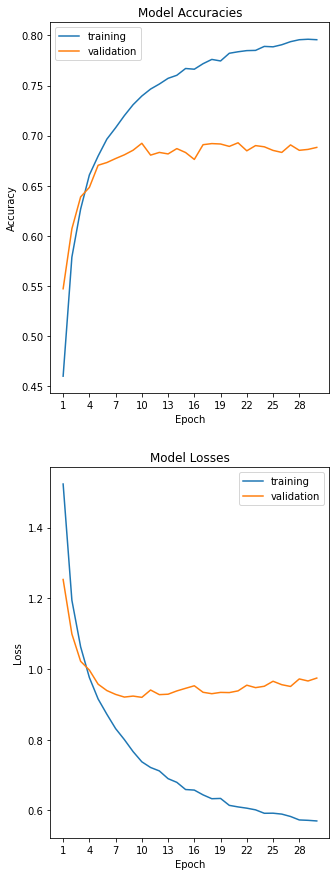

In [17]:
# create the path for saving the model and its history
model3_path = "cifar10_model3.saved_model"
model3_history_path = "cifar10_model3.saved_model_history"

if os.path.exists(model3_path) and os.path.exists(model3_history_path):
    # Load trained model
    model3 = tf.keras.models.load_model(model3_path)
    history3 = pickle.load(open(model3_history_path, "rb"))
    model_analysis_plot(history3)
else:
    # Train new model
    tf.random.set_seed(12345)
    model3.fit(training_examples, training_labels,
               batch_size = 64,
               epochs = 30,
               verbose = 2,
               validation_data = (test_examples, test_labels))
    history3 = model3.history.history
    model3.save(model3_path)
    pickle.dump(history3, open(model3_history_path, "wb"))
    model_analysis_plot(history3)

### Summarising Model 3's Performance

In [18]:
print(f"Model 3 Training Accuracy: {history3['accuracy'][-1]:.4}")
print(f"Model 3 Validation Accuracy: {history3['val_accuracy'][-1]:.4}")
print(f"Model 3 Training Loss: {history3['loss'][-1]:.4}")
print(f"Model 3 Validation Loss: {history3['val_loss'][-1]:.4}")
print(f"Model 3 Training Mean Square Error: {history3['mse'][-1]:.4}")
print(f"Model 3 Validation Mean Square Error: {history3['val_mse'][-1]:.4}")
print(f"Model 3 Training Mean Absolute Error: {history3['mae'][-1]:.4}")
print(f"Model 3 Validation Mean Absolute Error: {history3['val_mae'][-1]:.4}")

Model 3 Training Accuracy: 0.7957
Model 3 Validation Accuracy: 0.6883
Model 3 Training Loss: 0.5703
Model 3 Validation Loss: 0.9744
Model 3 Training Mean Square Error: 0.02864
Model 3 Validation Mean Square Error: 0.04386
Model 3 Training Mean Absolute Error: 0.05449
Model 3 Validation Mean Absolute Error: 0.07374


## CNN Implementation: Configuration 4

### Building the Network with Configuration 4

In [19]:
model4 = Sequential()

# first convolution layer
model4.add(Conv2D(64, (4,4), strides=(1,1), padding="same", activation='relu', input_shape=(32,32, 3),
                  kernel_initializer='he_normal', bias_initializer="zeros"))
# add a dropout layer
model4.add(Dropout(0.2))

# second convolution layer
model4.add(Conv2D(64, (2,2), strides=(2,2), padding="same", activation='relu',
                  kernel_initializer='he_normal', bias_initializer="zeros"))

# add a second dropout layer
model4.add(Dropout(0.2))

# third convolution layer
model4.add(Conv2D(32, (3,3), strides=(1,1), padding="same", activation='relu',
                  kernel_initializer='he_normal', bias_initializer="zeros"))

# add a third dropout layer
model4.add(Dropout(0.2))

# fourth convolution layer
model4.add(Conv2D(32, (3,3), strides=(1,1), padding="same", activation='relu',
                  kernel_initializer='he_normal', bias_initializer="zeros"))

# add a pooling layer
model4.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# add a fourth dropout layer
model4.add(Dropout(0.2))

# flatten the output
model4.add(Flatten())

# add a first fully connected layer
model4.add(Dense(64, activation="sigmoid"))

# add a fifth dropout layer.
model4.add(Dropout(0.2))

# add a second fully connected layer
model4.add(Dense(64, activation="sigmoid"))

# add a sixth dropout layer.
model4.add(Dropout(0.2))

# add a third fully connected layer
model4.add(Dense(10, activation="sigmoid"))

### Compiling and Summarising Model 4

In [20]:
# compile the model
model4.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy', 'mse', 'mae'])

# summarise the model
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        16448     
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)       

### Saving, Loading and Training Model 4

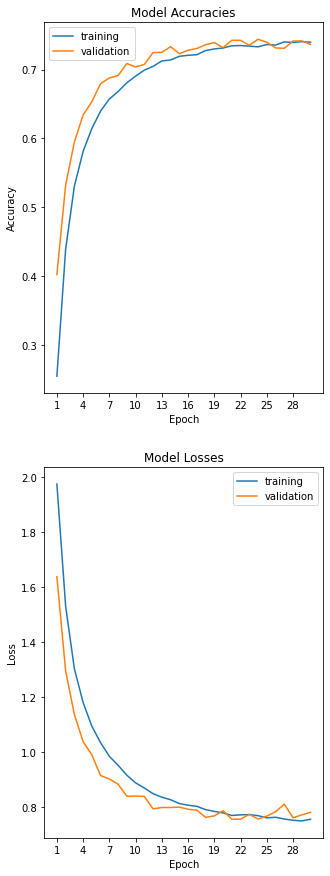

In [21]:
# create the path for saving the model and its history
model4_path = "cifar10_model4.saved_model"
model4_history_path = "cifar10_model4.saved_model_history"

if os.path.exists(model4_path) and os.path.exists(model4_history_path):
    # Load trained model
    model4 = tf.keras.models.load_model(model4_path)
    history4 = pickle.load(open(model4_history_path, "rb"))
    model_analysis_plot(history4)
else:
    # Train new model
    tf.random.set_seed(12345)
    model4.fit(training_examples, training_labels,
               batch_size = 64,
               epochs = 30,
               verbose = 2,
               validation_data = (test_examples, test_labels))
    history4 = model4.history.history
    model4.save(model4_path)
    pickle.dump(history4, open(model4_history_path, "wb"))
    model_analysis_plot(history4)

### Summarising Model 4's Performance

In [22]:
print(f"Model 4 Training Accuracy: {history4['accuracy'][-1]:.4}")
print(f"Model 4 Validation Accuracy: {history4['val_accuracy'][-1]:.4}")
print(f"Model 4 Training Loss: {history4['loss'][-1]:.4}")
print(f"Model 4 Validation Loss: {history4['val_loss'][-1]:.4}")
print(f"Model 4 Training Mean Square Error: {history4['mse'][-1]:.4}")
print(f"Model 4 Validation Mean Square Error: {history4['val_mse'][-1]:.4}")
print(f"Model 4 Training Mean Absolute Error: {history4['mae'][-1]:.4}")
print(f"Model 4 Validation Mean Absolute Error: {history4['val_mae'][-1]:.4}")

Model 4 Training Accuracy: 0.7398
Model 4 Validation Accuracy: 0.7366
Model 4 Training Loss: 0.7562
Model 4 Validation Loss: 0.7813
Model 4 Training Mean Square Error: 0.1661
Model 4 Validation Mean Square Error: 0.1607
Model 4 Training Mean Absolute Error: 0.2719
Model 4 Validation Mean Absolute Error: 0.2625


## CNN Implementation: Configuration 5

### Building the Network with Configuration 5

In [23]:
model5 = Sequential()

# first convolution layer
model5.add(Conv2D(64, (4,4), strides=(1,1), padding="same", activation='relu', input_shape=(32,32, 3),
                  kernel_initializer='he_normal', bias_initializer="zeros"))

# add a first dropout layer
model5.add(Dropout(0.2))

# second convolution layer
model5.add(Conv2D(64, (2,2), strides=(2,2), padding="same", activation='relu',
                  kernel_initializer='he_normal', bias_initializer="zeros"))

# add a second dropout layer
model5.add(Dropout(0.2))

# third convolution layer
model5.add(Conv2D(32, (3,3), strides=(1,1), padding="same", activation='relu',
                  kernel_initializer='he_normal', bias_initializer="zeros"))

# add a third dropout layer
model5.add(Dropout(0.2))

# fourth convolution layer
model5.add(Conv2D(32, (3,3), strides=(1,1), padding="same", activation='relu',
                  kernel_initializer='he_normal', bias_initializer="zeros"))

# add a pooling layer
model5.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# add a fourth dropout layer.
model5.add(Dropout(0.2))

# flatten the output
model5.add(Flatten())

# add a first fully connected layer
model5.add(Dense(64, activation="relu"))

# add a fourth dropout layer.
model5.add(Dropout(0.2))

# add a second fully connected layer
model5.add(Dense(64, activation="relu"))

# add a fifth dropout layer.
model5.add(Dropout(0.2))

# add a second fully connected layer
model5.add(Dense(64, activation="relu"))

# add a fifth dropout layer.
model5.add(Dropout(0.2))

# add the fully connected layer
model5.add(Dense(10, activation="softmax"))


### Compiling and Summarising Model 5

In [24]:
# compile the model
model5.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy', 'mse', 'mae'])

# summarise the model
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        3136      
                                                                 
 dropout_8 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        16448     
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)       

### Saving, Loading and Training Model 5

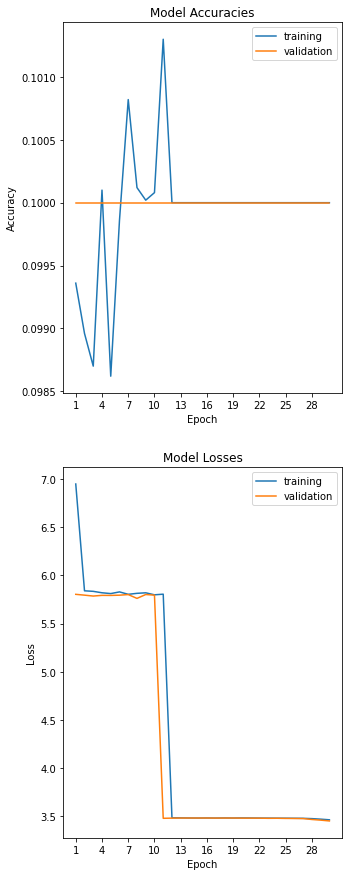

In [25]:
# create the path for saving the model and its history
model5_path = "cifar10_model5.saved_model"
model5_history_path = "cifar10_model5.saved_model_history"

if os.path.exists(model5_path) and os.path.exists(model5_history_path):
    # Load trained model
    model5 = tf.keras.models.load_model(model5_path)
    history5 = pickle.load(open(model5_history_path, "rb"))
    model_analysis_plot(history5)
else:
    # Train new model
    tf.random.set_seed(12345)
    model5.fit(training_examples, training_labels,
               batch_size = 64,
               epochs = 30,
               verbose = 2,
               validation_data = (test_examples, test_labels))
    history5 = model5.history.history
    model5.save(model5_path)
    pickle.dump(history5, open(model5_history_path, "wb"))
    model_analysis_plot(history5)

### Summarising Model 5's Performance

In [26]:
print(f"Model 5 Training Accuracy: {history5['accuracy'][-1]:.4}")
print(f"Model 5 Validation Accuracy: {history5['val_accuracy'][-1]:.4}")
print(f"Model 5 Training Loss: {history5['loss'][-1]:.4}")
print(f"Model 5 Validation Loss: {history5['val_loss'][-1]:.4}")
print(f"Model 5 Training Mean Square Error: {history5['mse'][-1]:.4}")
print(f"Model 5 Validation Mean Square Error: {history5['val_mse'][-1]:.4}")
print(f"Model 5 Training Mean Absolute Error: {history5['mae'][-1]:.4}")
print(f"Model 5 Validation Mean Absolute Error: {history5['val_mae'][-1]:.4}")

Model 5 Training Accuracy: 0.1
Model 5 Validation Accuracy: 0.1
Model 5 Training Loss: 3.464
Model 5 Validation Loss: 3.452
Model 5 Training Mean Square Error: 0.7825
Model 5 Validation Mean Square Error: 0.8107
Model 5 Training Mean Absolute Error: 0.8166
Model 5 Validation Mean Absolute Error: 0.8416


## CNN Implementation: Configuration 6

### Building the Network with Configuration 6

In [27]:
model6 = Sequential()

# first convolution layer
model6.add(Conv2D(64, (4,4), strides=(1,1), padding="same", activation='relu', input_shape=(32,32, 3),
                  kernel_initializer='he_normal', bias_initializer="zeros"))

# add a first dropout layer
model6.add(Dropout(0.2))

# second convolution layer
model6.add(Conv2D(64, (2,2), strides=(2,2), padding="same", activation='relu',
                  kernel_initializer='he_normal', bias_initializer="zeros"))

# add a second dropout layer
model6.add(Dropout(0.2))

# third convolution layer
model6.add(Conv2D(32, (3,3), strides=(1,1), padding="same", activation='relu',
                  kernel_initializer='he_normal', bias_initializer="zeros"))

# add a third dropout layer
model6.add(Dropout(0.2))

# fourth convolution layer
model6.add(Conv2D(32, (3,3), strides=(1,1), padding="same", activation='relu',
                  kernel_initializer='he_normal', bias_initializer="zeros"))

# add a pooling layer
model6.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# add a fourth dropout layer.
model6.add(Dropout(0.2))

# flatten the output
model6.add(Flatten())

# add a first fully connected layer
model6.add(Dense(64, activation="relu"))

# add a fourth dropout layer.
model6.add(Dropout(0.2))

# add a second fully connected layer
model6.add(Dense(64, activation="relu"))

# add a fifth dropout layer.
model6.add(Dropout(0.2))


# add the fully connected layer
model6.add(Dense(10, activation="tanh"))

### Compiling and Summarising Model 6

In [28]:
# compile the model
model6.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy', 'mse', 'mae'])

# summarise the model
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        3136      
                                                                 
 dropout_9 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        16448     
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 dropout_11 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)       

### Saving, Loading and Training Model 6

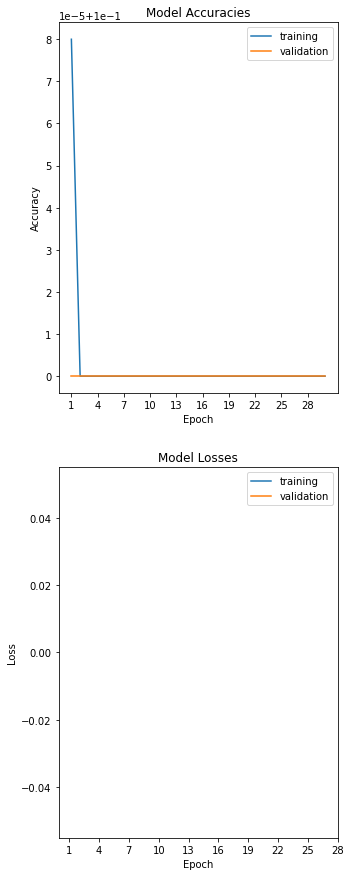

In [29]:
# create the path for saving the model and its history
model6_path = "cifar10_model6.saved_model"
model6_history_path = "cifar10_model6.saved_model_history"

if os.path.exists(model6_path) and os.path.exists(model6_history_path):
    # Load trained model
    model6 = tf.keras.models.load_model(model6_path)
    history6 = pickle.load(open(model6_history_path, "rb"))
    model_analysis_plot(history6)
else:
    # Train new model
    tf.random.set_seed(12345)
    model6.fit(training_examples, training_labels,
               batch_size = 64,
               epochs = 30,
               verbose = 2,
               validation_data = (test_examples, test_labels))
    history6 = model6.history.history
    model6.save(model6_path)
    pickle.dump(history6, open(model6_history_path, "wb"))
    model_analysis_plot(history6)

### Summarising Model 5's Performance

In [30]:
print(f"Model 6 Training Accuracy: {history6['accuracy'][-1]:.4}")
print(f"Model 6 Validation Accuracy: {history6['val_accuracy'][-1]:.4}")
print(f"Model 6 Training Loss: {history6['loss'][-1]:.4}")
print(f"Model 6 Validation Loss: {history6['val_loss'][-1]:.4}")
print(f"Model 6 Training Mean Square Error: {history6['mse'][-1]:.4}")
print(f"Model 6 Validation Mean Square Error: {history6['val_mse'][-1]:.4}")
print(f"Model 6 Training Mean Absolute Error: {history6['mae'][-1]:.4}")
print(f"Model 6 Validation Mean Absolute Error: {history6['val_mae'][-1]:.4}")

Model 6 Training Accuracy: 0.1
Model 6 Validation Accuracy: 0.1
Model 6 Training Loss: nan
Model 6 Validation Loss: nan
Model 6 Training Mean Square Error: nan
Model 6 Validation Mean Square Error: nan
Model 6 Training Mean Absolute Error: nan
Model 6 Validation Mean Absolute Error: nan


## Accuracy Comparison across Configurations

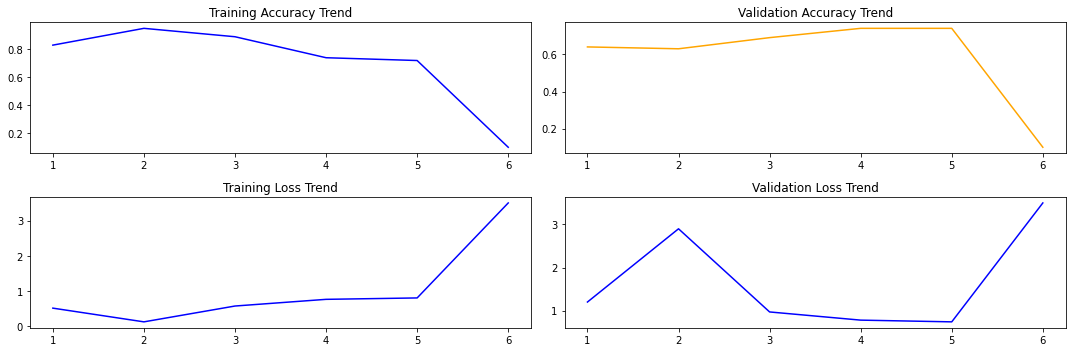

In [31]:
import matplotlib.pyplot as plt
import numpy as np
train_acc = np.array([0.83, 0.95, 0.89, 0.74, 0.72, 0.1])
val_acc = np.array([0.64, 0.63, 0.69, 0.74, 0.74, 0.1])
train_loss = np.array([0.51, 0.12, 0.57, 0.76, 0.80, 3.5])
val_loss = np.array([1.2, 2.9, 0.97, 0.78, 0.74, 3.5])
config_id = np.array([1, 2, 3, 4, 5, 6])

fig, axes = plt.subplots(2, 2, figsize=(15, 5))
axes = axes.flatten()
axes[0].plot(config_id, train_acc, color='blue')
axes[0].set_title('Training Accuracy Trend')
axes[1].plot(config_id, val_acc, color='orange')
axes[1].set_title('Validation Accuracy Trend')
axes[2].plot(config_id, train_loss, color='blue')
axes[2].set_title('Training Loss Trend')
axes[3].plot(config_id, val_loss, color='blue')
axes[3].set_title('Validation Loss Trend')
plt.tight_layout()
plt.show()

## Error Comparison across Configurations

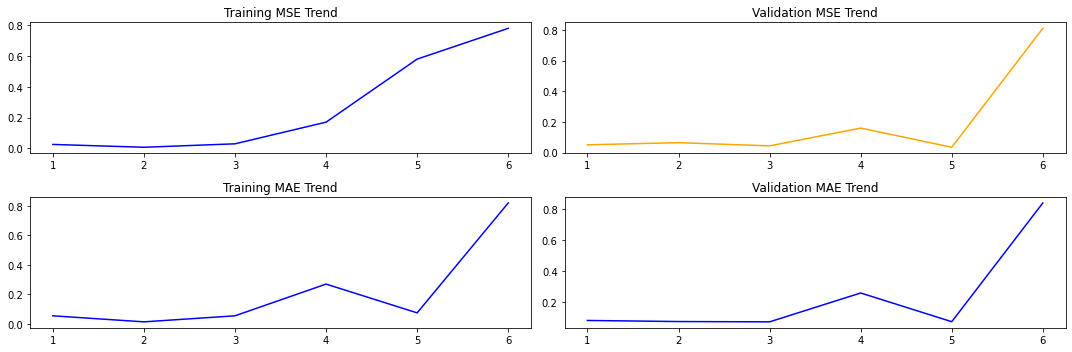

In [32]:
train_mse = np.array([0.025, 0.0067, 0.029, 0.17, 0.58, 0.78])
val_mse = np.array([0.051, 0.065, 0.044, 0.16, 0.035, 0.81])
train_mae = np.array([0.055, 0.014, 0.055, 0.27, 0.075, 0.82])
val_mae = np.array([0.083, 0.076, 0.074, 0.26, 0.075, 0.84])
config_id = np.array([1, 2, 3, 4, 5, 6])

fig, axes = plt.subplots(2, 2, figsize=(15, 5))
axes = axes.flatten()
axes[0].plot(config_id, train_mse, color='blue')
axes[0].set_title('Training MSE Trend')
axes[1].plot(config_id, val_mse, color='orange')
axes[1].set_title('Validation MSE Trend')
axes[2].plot(config_id, train_mae, color='blue')
axes[2].set_title('Training MAE Trend')
axes[3].plot(config_id, val_mae, color='blue')
axes[3].set_title('Validation MAE Trend')
plt.tight_layout()
plt.show()

## Best Model Detection

In [34]:
best_model_index = np.argmax([x["val_accuracy"][-1] + x["accuracy"][-1] for x in (history4, history5)])
best_model = (model4, model5)[best_model_index]
history = (history4, history5)[best_model_index]
test_vectors = (training_examples, test_examples)[best_model_index]

print(f"Best Model: {best_model_index + 1}")
print(f"Training Accuracy: {history['accuracy'][-1]:.4}")
print(f"Validation Accuracy: {history['val_accuracy'][-1]:.4}")

Best Model: 1
Training Accuracy: 0.7398
Validation Accuracy: 0.7366
